In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from tensorflow import set_random_seed

Using TensorFlow backend.


In [2]:
np.random.seed(2015)
set_random_seed(2015)

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Preprocessing
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test  = X_test.astype("float32")
X_train /= 255
X_test  /= 255
print(X_train.shape[0], "training samples")
print(X_test.shape[0], "testing samples")

60000 training samples
10000 testing samples


In [5]:
# Convert labels to one-hot coding
# e.g. 1 -> array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

The argument *input_dim* is equivalent to *input_shape* ([reference](https://keras.io/getting-started/sequential-model-guide/)).

In [6]:
# Define the model
model = Sequential([
        Dense(128, input_dim=784), Activation("relu"), Dropout(0.3),
        Dense(128), Activation("relu"), Dropout(0.3),
        Dense(10), Activation("softmax")
    ])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [8]:
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(momentum=0.4),
              metrics=["accuracy"])

In [9]:
time_start = time.clock()
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=200,
                    verbose=1,
                    validation_split=0.2)
time_end = time.clock()

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s - loss: 1.4502 - acc: 0.5366 - val_loss: 0.6187 - val_acc: 0.8605
Epoch 2/200
48000/48000 [==============================] - 2s - loss: 0.7097 - acc: 0.7814 - val_loss: 0.4052 - val_acc: 0.8915
Epoch 3/200
48000/48000 [==============================] - 2s - loss: 0.5536 - acc: 0.8320 - val_loss: 0.3410 - val_acc: 0.9031
Epoch 4/200
48000/48000 [==============================] - 2s - loss: 0.4834 - acc: 0.8561 - val_loss: 0.3051 - val_acc: 0.9123
Epoch 5/200
48000/48000 [==============================] - 2s - loss: 0.4309 - acc: 0.8709 - val_loss: 0.2810 - val_acc: 0.9196
Epoch 6/200
48000/48000 [==============================] - 2s - loss: 0.3983 - acc: 0.8820 - val_loss: 0.2609 - val_acc: 0.9236
Epoch 7/200
48000/48000 [==============================] - 2s - loss: 0.3744 - acc: 0.8895 - val_loss: 0.2466 - val_acc: 0.9284
Epoch 8/200
48000/48000 [=============================

In [10]:
time_end = time.clock()

In [11]:
duration = time_end - time_start
print("Time to train")
print("Time elapsed in seconds : %.0f" % duration)
print("Time elapsed in minutes : %.1f" % (duration/60))
print("Time elapsed in hours   : %.1f" % (duration/3600))

Time to train
Time elapsed in seconds : 491
Time elapsed in minutes : 8.2
Time elapsed in hours   : 0.1


In [12]:
score = model.evaluate(X_test, y_test,
                       verbose=1)
print("")
print("Test score:", score[0])
print("Test accuracy:", score[1])

 9376/10000 [===========================>..] - ETA: 0s
Test score: 0.0749116264819
Test accuracy: 0.9791


In [13]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


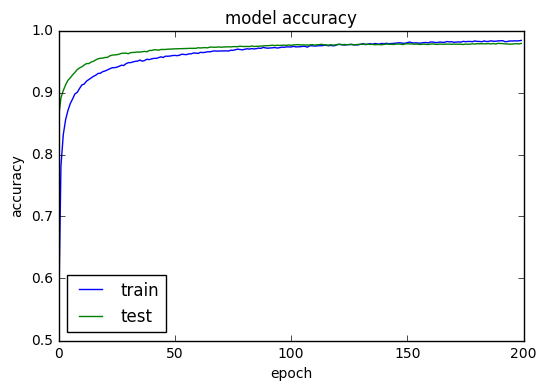

In [14]:
# Accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower left")
plt.show()

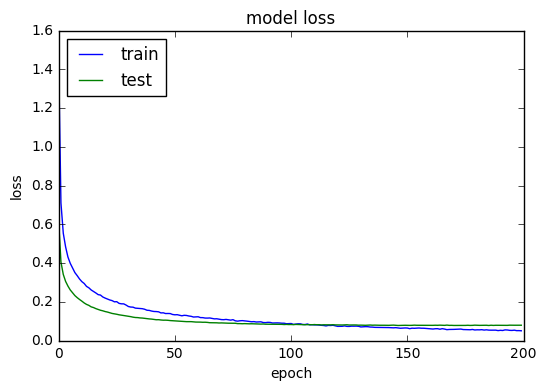

In [15]:
# Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()